# Lecture 2 - Scaling and Normalization
Chuyển đổi các biến số học để có các thuộc tính hữu ích.

Trong notebook này, chúng ta sẽ xem xét cách chuẩn hóa và điều chỉnh tỷ lệ dữ liệu (và sự khác biệt giữa hai khái niệm này!).

Hãy bắt đầu thôi!

## Thiết lập môi trường của chúng ta

Điều đầu tiên chúng ta cần làm là tải các thư viện mà chúng ta sẽ sử dụng.

In [3]:
# Các module chúng ta sẽ sử dụng
import pandas as pd
import numpy as np

# Để thực hiện Chuyển đổi Box-Cox
from scipy import stats

# Để thực hiện chuẩn hóa min_max
from mlxtend.preprocessing import minmax_scaling

# Các module vẽ đồ thị
import seaborn as sns
import matplotlib.pyplot as plt

# Đặt seed để đảm bảo tính tái tạo
np.random.seed(0)

## Chuẩn hóa và Điều chỉnh tỷ lệ: Sự khác biệt là gì?

Một trong những lý do khiến việc phân biệt giữa chuẩn hóa và điều chỉnh tỷ lệ dễ bị nhầm lẫn là vì các thuật ngữ này đôi khi được sử dụng thay thế cho nhau và, để làm cho nó thêm phần khó hiểu, chúng rất giống nhau! Trong cả hai trường hợp, bạn đều đang chuyển đổi các giá trị của các biến số học sao cho các điểm dữ liệu đã chuyển đổi có những thuộc tính hữu ích cụ thể. Sự khác biệt là:
- Trong **điều chỉnh tỷ lệ**, bạn đang thay đổi *phạm vi* của dữ liệu, trong khi
- Trong **chuẩn hóa**, bạn đang thay đổi *hình dạng phân phối* của dữ liệu.

Hãy cùng tìm hiểu kỹ hơn về từng lựa chọn này.

## Điều chỉnh tỷ lệ

Điều này có nghĩa là bạn đang chuyển đổi dữ liệu của mình sao cho nó vừa vặn với một tỷ lệ cụ thể, như từ 0-100 hoặc 0-1. Bạn muốn điều chỉnh tỷ lệ dữ liệu khi đang sử dụng các phương pháp dựa trên các thước đo về khoảng cách giữa các điểm dữ liệu, như [máy vector hỗ trợ (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) hoặc [k-nearest neighbors (KNN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Với những thuật toán này, sự thay đổi "1" trong bất kỳ đặc điểm số học nào đều được coi là quan trọng như nhau.

Ví dụ, bạn có thể đang xem xét giá của một số sản phẩm bằng cả Yên và Đô la Mỹ. Một Đô la Mỹ có giá trị khoảng 100 Yên, nhưng nếu bạn không điều chỉnh tỷ lệ giá, các phương pháp như SVM hoặc KNN sẽ coi sự khác biệt giá 1 Yên quan trọng như sự khác biệt giá 1 Đô la Mỹ! Điều này rõ ràng không phù hợp với trực giác của chúng ta về thế giới. Với tiền tệ, bạn có thể chuyển đổi giữa các loại tiền. Nhưng còn khi bạn đang xem xét các yếu tố như chiều cao và cân nặng thì sao? Không hoàn toàn rõ ràng là bao nhiêu pound bằng một inch (hoặc bao nhiêu kilogram bằng một mét).

Bằng cách điều chỉnh tỷ lệ các biến của bạn, bạn có thể giúp so sánh các biến khác nhau trên một nền tảng bình đẳng. Để làm rõ điều này, hãy cùng xem một ví dụ tưởng tượng. (Đừng lo, chúng ta sẽ làm việc với dữ liệu thực tế trong [**bài tập tiếp theo**](https://www.kaggle.com/kernels/fork/10824404)!)


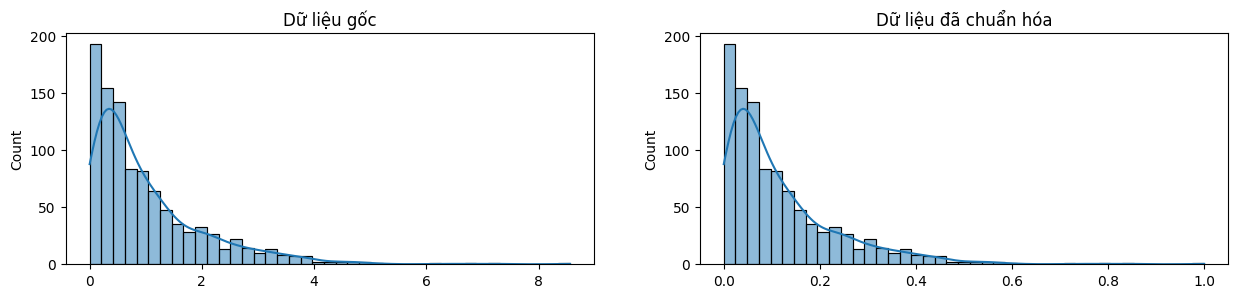

In [4]:
# Tạo 1000 điểm dữ liệu được rút ngẫu nhiên từ phân phối mũ
original_data = np.random.exponential(size=1000)

# Chuẩn hóa dữ liệu bằng phương pháp min-max từ 0 đến 1
scaled_data = minmax_scaling(original_data, columns=[0])

# Vẽ biểu đồ của cả hai để so sánh
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Dữ liệu gốc")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Dữ liệu đã chuẩn hóa")
plt.show()

Lưu ý rằng *hình dạng* của dữ liệu không thay đổi, nhưng thay vì phạm vi từ 0 đến khoảng 8, giờ nó có phạm vi từ 0 đến 1.

## Chuẩn hóa

Điều chỉnh tỷ lệ chỉ thay đổi phạm vi của dữ liệu. Chuẩn hóa là một sự chuyển đổi mạnh mẽ hơn. Mục tiêu của chuẩn hóa là thay đổi các quan sát sao cho chúng có thể được mô tả như một phân phối chuẩn.

> **[Phân phối chuẩn:](https://en.wikipedia.org/wiki/Normal_distribution)** Còn được gọi là "đường cong chuông", đây là một phân phối thống kê cụ thể, nơi có một số quan sát xấp xỉ bằng nhau nằm trên và dưới giá trị trung bình, giá trị trung bình và giá trị trung vị là như nhau, và có nhiều quan sát gần với giá trị trung bình hơn. Phân phối chuẩn cũng được gọi là phân phối Gaussian.

Nói chung, bạn sẽ chuẩn hóa dữ liệu nếu bạn định sử dụng một kỹ thuật học máy hoặc thống kê mà giả định rằng dữ liệu của bạn có phân phối chuẩn. Một số ví dụ của những kỹ thuật này bao gồm phân tích phân biệt tuyến tính (LDA) và Naive Bayes phân phối Gaussian. (Mẹo chuyên nghiệp: bất kỳ phương pháp nào có "Gaussian" trong tên đều có thể giả định tính chuẩn.)

Phương pháp chúng ta sử dụng để chuẩn hóa ở đây được gọi là [Chuyển đổi Box-Cox](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation). Hãy cùng xem nhanh một ví dụ về việc chuẩn hóa dữ liệu trông như thế nào:

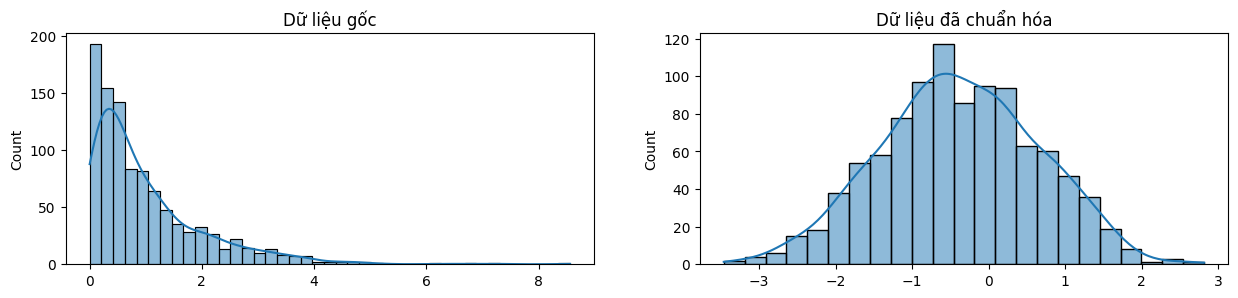

In [5]:
# Chuẩn hóa dữ liệu phân phối mũ bằng boxcox
normalized_data = stats.boxcox(original_data)

# Vẽ biểu đồ của cả hai để so sánh
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Dữ liệu gốc")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Dữ liệu đã chuẩn hóa")
plt.show()

Lưu ý rằng *hình dạng* của dữ liệu đã thay đổi. Trước khi chuẩn hóa, nó gần như có hình chữ L. Nhưng sau khi chuẩn hóa, nó trông giống như hình dạng của một chiếc chuông (do đó có tên là "đường cong chuông").

## Your turn

It's time to [**apply what you just learned**](https://www.kaggle.com/kernels/fork/10824404) a dataset of Kickstarter projects.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*